# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()
iris_data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df = pd.DataFrame(iris_data['data'],columns=['sepal length','sepal width','petal length','petal width'])
    df['target'] = iris_data['target']
    df['class'] = df['target'].replace([0,1,2],iris_data['target_names'])
    return df
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
9,4.9,3.1,1.5,0.1,0,setosa
103,6.3,2.9,5.6,1.8,2,virginica
140,6.7,3.1,5.6,2.4,2,virginica
72,6.3,2.5,4.9,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
138,6.0,3.0,4.8,1.8,2,virginica
112,6.8,3.0,5.5,2.1,2,virginica
0,5.1,3.5,1.4,0.2,0,setosa
77,6.7,3.0,5.0,1.7,1,versicolor


In [4]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [5]:

#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x = df_iris[['sepal length','sepal width','petal length','petal width']].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [7]:
mergings = 0 
# YOUR CODE HERE
mergings = linkage(x,method='complete')
mergings

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

In [8]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

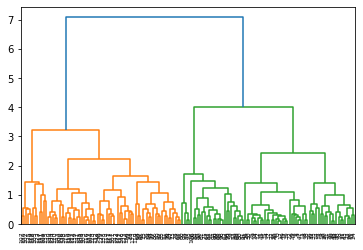

In [9]:
dn = 0
# YOUR CODE HERE
dn = dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)

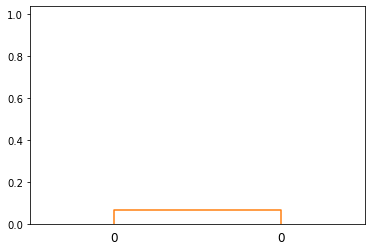

In [10]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [37]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values
points

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008,

**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [12]:
model = 0
# YOUR CODE HERE
model = KMeans(n_clusters=3)

In [13]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [14]:
# YOUR CODE HERE
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [15]:
# YOUR CODE HERE
labels = model.predict(points)
labels.shape

(300,)

In [16]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [64]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    d = 0
    # YOUR CODE HERE
    for i, label in enumerate(labels):
        #print(label)
        if label == 0:
            if len(data_0) == 0:
                data_0 = points[i]
            else:
                data_0 = np.vstack((data_0,points[i]))
        elif label == 1:
            if len(data_1) == 0:
                data_1 = points[i]
            else:
                data_1 = np.vstack((data_1,points[i]))
        else:
            if len(data_2) == 0:
                data_2 = points[i]
            else:
                data_2 = np.vstack((data_2,points[i]))
    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)
print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(95, 2)
(111, 2)
(94, 2)


In [65]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

[-1.52901547 -1.80110088 -1.63567888 -1.61925804 -1.84329582 -1.68576139
 -1.56478322 -1.43386366 -1.58567922 -2.19680359 -1.2107308  -1.8356219
 -1.48970175 -2.0521341  -1.59227759 -1.47344152 -1.35514704 -1.43590032
 -1.5137129  -1.97233903 -1.87663382 -1.37481454 -1.80564029 -1.68489862
 -1.21795929 -1.05182747 -1.50219748 -1.72717293 -1.60995631 -1.09111021
 -1.33328681 -1.14829098 -1.93467327 -1.57761893 -1.65237509 -1.89607082
 -1.61158505 -1.57512205 -1.40054298 -2.54346204 -1.34544875 -1.35478629
 -1.31368677 -1.91787359 -1.63802869 -1.95712763 -1.72818632 -1.51696082
 -1.54968857 -1.16286609 -1.8603152  -1.49897451 -1.49154578 -1.49932011
 -1.5499724  -1.45835281 -1.28566081 -1.27256815 -2.11283993 -1.6293824
 -1.53819139 -1.54418956 -1.33424393 -1.86197825 -1.61977671 -1.56993593
 -1.9651013  -1.58306818 -1.57195923 -0.98145373 -1.48637844 -1.61897897
 -1.21967812 -1.19828397 -1.6422739  -1.64303119 -1.93030087 -2.37296135
 -1.02335902 -1.32761107 -1.50987909 -1.27784224 -1.3

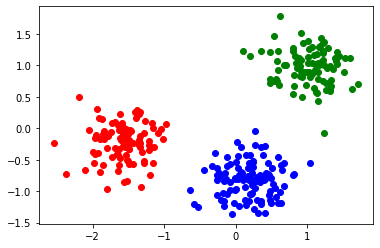

In [90]:
# plotting the data 
# YOUR CODE HERE
plt.scatter(data_0[:,0],data_0[:,1],c='red')
plt.scatter(data_1[:,0],data_1[:,1],c='blue')
plt.scatter(data_2[:,0],data_2[:,1],c='green')

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [70]:

# YOUR CODE HERE
new_labels = model.predict(new_points)
new_labels.shape


(100,)

In [67]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [75]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

# YOUR CODE HERE
new_0,new_1,new_2 =separate_labels(new_labels, new_points)
print(new_0.shape)
new_1.shape

(34, 2)


(32, 2)

In [76]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

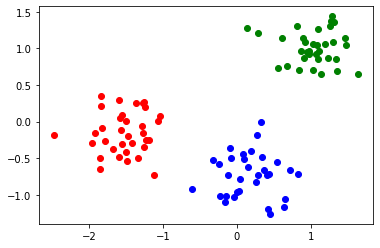

In [91]:
#plot the new labels


# YOUR CODE HERE
plt.scatter(new_0[:,0],new_0[:,1],c='red')
plt.scatter(new_1[:,0],new_1[:,1],c='blue')
plt.scatter(new_2[:,0],new_2[:,1],c='green')

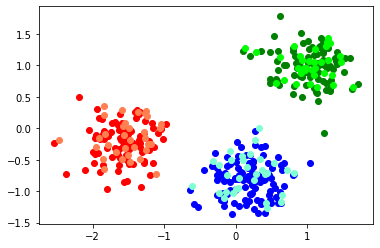

In [92]:
#plot all the points together

# YOUR CODE HERE
plt.scatter(data_0[:,0],data_0[:,1],c='red')
plt.scatter(data_1[:,0],data_1[:,1],c='blue')
plt.scatter(data_2[:,0],data_2[:,1],c='green')
plt.scatter(new_0[:,0],new_0[:,1],c='coral')
plt.scatter(new_1[:,0],new_1[:,1],c='aquamarine')
plt.scatter(new_2[:,0],new_2[:,1],c='lime')